# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources in the README.md file
- Happy learning!

In [1]:
# Import your libraries:

%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Challenge 1 - Import and Describe the Dataset

In this lab, we will use a dataset containing information about customer preferences. We will look at how much each customer spends in a year on each subcategory in the grocery store and try to find similarities using clustering.

The origin of the dataset is [here](https://archive.ics.uci.edu/ml/datasets/wholesale+customers).

In [37]:
# loading the data:
customers = pd.read_csv('../Wholesale customers data.csv')

#### Explore the dataset with mathematical and visualization techniques. What do you find?

Checklist:

* What does each column mean?
* Any categorical data to convert?
* Any missing data to remove?
* Column collinearity - any high correlations?
* Descriptive statistics - any outliers to remove?
* Column-wise data distribution - is the distribution skewed?
* Etc.

Additional info: Over a century ago, an Italian economist named Vilfredo Pareto discovered that roughly 20% of the customers account for 80% of the typical retail sales. This is called the [Pareto principle](https://en.wikipedia.org/wiki/Pareto_principle). Check if this dataset displays this characteristic.

In [38]:
# Your code here:
display(customers.head(5))
customers.info()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [39]:
customers.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


<function matplotlib.pyplot.show(close=None, block=None)>

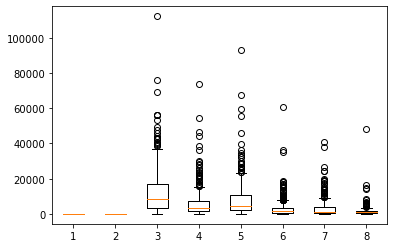

In [40]:
plt.boxplot(customers.values)
plt.show

In [41]:
cc = customers.corr()
cc[(cc > 0.8) & (cc < 1)].any()
# Grocery x Detergents_Paper

Channel             False
Region              False
Fresh               False
Milk                False
Grocery              True
Frozen              False
Detergents_Paper     True
Delicassen          False
dtype: bool

<AxesSubplot:xlabel='Grocery', ylabel='Detergents_Paper'>

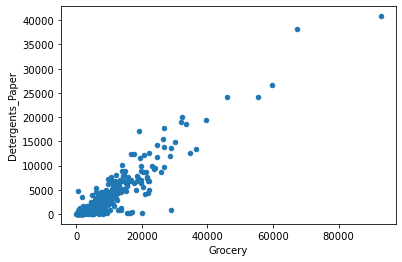

In [42]:
# Your observations here
customers.plot.scatter('Grocery','Detergents_Paper')

<ipython-input-43-b22be0f30322>:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(customers.corr(), dtype=np.bool))


Text(0.5, 1.0, 'Triangle Correlation Heatmap')

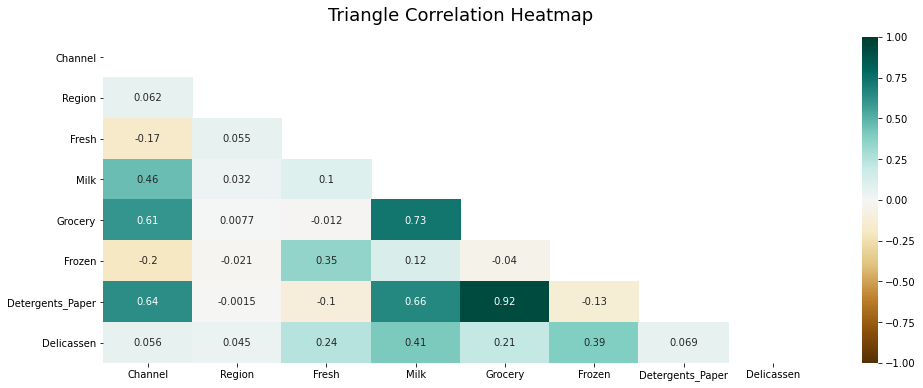

In [43]:
import seaborn as sns

plt.figure(figsize=(16, 6))
mask = np.triu(np.ones_like(customers.corr(), dtype=np.bool))
heatmap = sns.heatmap(customers.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16)

# Challenge 2 - Data Cleaning and Transformation

If your conclusion from the previous challenge is the data need cleaning/transformation, do it in the cells below. However, if your conclusion is the data need not be cleaned or transformed, feel free to skip this challenge. But if you do choose the latter, please provide rationale.

In [44]:
# Your code here
categorical_features = ['Channel', 'Region']
continuous_features = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']

for col in categorical_features:
    dummies = pd.get_dummies(customers[col], prefix=col)
    customers = pd.concat([customers, dummies], axis=1)
    customers.drop(col, axis=1, inplace=True)
    
customers.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Channel_1,Channel_2,Region_1,Region_2,Region_3
0,12669,9656,7561,214,2674,1338,0,1,0,0,1
1,7057,9810,9568,1762,3293,1776,0,1,0,0,1
2,6353,8808,7684,2405,3516,7844,0,1,0,0,1
3,13265,1196,4221,6404,507,1788,1,0,0,0,1
4,22615,5410,7198,3915,1777,5185,0,1,0,0,1


We needed to do a split of categorical and continuous features.
After we need to transform them in dumies

# Challenge 3 - Data Preprocessing

One problem with the dataset is the value ranges are remarkably different across various categories (e.g. `Fresh` and `Grocery` compared to `Detergents_Paper` and `Delicassen`). If you made this observation in the first challenge, you've done a great job! This means you not only completed the bonus questions in the previous Supervised Learning lab but also researched deep into [*feature scaling*](https://en.wikipedia.org/wiki/Feature_scaling). Keep on the good work!

Diverse value ranges in different features could cause issues in our clustering. The way to reduce the problem is through feature scaling. We'll use this technique again with this dataset.

#### We will use the `StandardScaler` from `sklearn.preprocessing` and scale our data. Read more about `StandardScaler` [here](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler).

*After scaling your data, assign the transformed data to a new variable `customers_scale`.*

In [74]:
# Your import here:

from sklearn.preprocessing import StandardScaler

# Your code here:
scaler = StandardScaler()
scaler.fit(customers)
customers_scale = scaler.transform(customers)

# Challenge 4 - Data Clustering with K-Means

Now let's cluster the data with K-Means first. Initiate the K-Means model, then fit your scaled data. In the data returned from the `.fit` method, there is an attribute called `labels_` which is the cluster number assigned to each data record. What you can do is to assign these labels back to `customers` in a new column called `customers['labels']`. Then you'll see the cluster results of the original data.

In [75]:
# Your code here:
from sklearn.cluster import KMeans

kmeans = KMeans()
kmeans.fit(customers_scale)
customers['labels'] = kmeans.labels_

Count the values in `labels`.

In [76]:
# Your code here:
customers['labels'].value_counts()

2    171
1     98
4     59
3     45
0     40
5     16
7     10
6      1
Name: labels, dtype: int64

# Challenge 5 - Data Clustering with DBSCAN

Now let's cluster the data using DBSCAN. Use `DBSCAN(eps=0.5)` to initiate the model, then fit your scaled data. In the data returned from the `.fit` method, assign the `labels_` back to `customers['labels_DBSCAN']`. Now your original data have two labels, one from K-Means and the other from DBSCAN.

In [77]:
# Your code here
from sklearn.cluster import DBSCAN

dbscan_model = DBSCAN(eps=0.5)
dbscan_model.fit(customers_scale)
customers['labels_DBSCAN'] = dbscan_model.labels_

Count the values in `labels_DBSCAN`.

In [78]:
# Your code here:
customers['labels_DBSCAN'].value_counts()

-1    257
 1    128
 5     22
 4      7
 6      6
 0      5
 3      5
 2      5
 7      5
Name: labels_DBSCAN, dtype: int64

# Challenge 6 - Compare K-Means with DBSCAN

Now we want to visually compare how K-Means and DBSCAN have clustered our data. We will create scatter plots for several columns. For each of the following column pairs, plot a scatter plot using `labels` and another using `labels_DBSCAN`. Put them side by side to compare. Which clustering algorithm makes better sense?

Columns to visualize:

* `Detergents_Paper` as X and `Milk` as y
* `Grocery` as X and `Fresh` as y
* `Frozen` as X and `Delicassen` as y

Visualize `Detergents_Paper` as X and `Milk` as y by `labels` and `labels_DBSCAN` respectively

C:\Users\msart\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\msart\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Detergents_Paper', ylabel='Milk'>

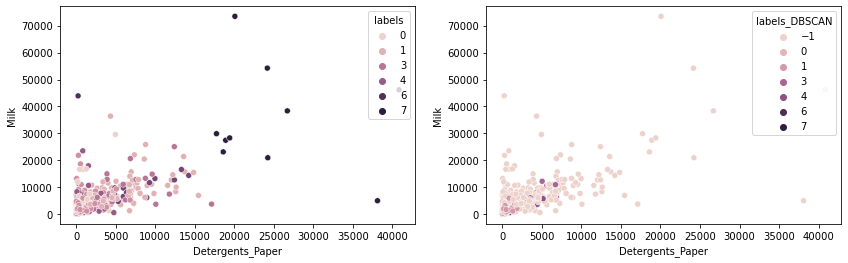

In [79]:
# Your code here:
fig, ax = plt.subplots(1,2, figsize=(14,4))
sns.scatterplot(customers['Detergents_Paper'], customers['Milk'], hue=customers['labels'], data=customers, ax=ax[0])
sns.scatterplot(customers['Detergents_Paper'], customers['Milk'], hue=customers['labels_DBSCAN'], data=customers, ax=ax[1])

Visualize `Grocery` as X and `Fresh` as y by `labels` and `labels_DBSCAN` respectively

C:\Users\msart\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\msart\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Grocery', ylabel='Fresh'>

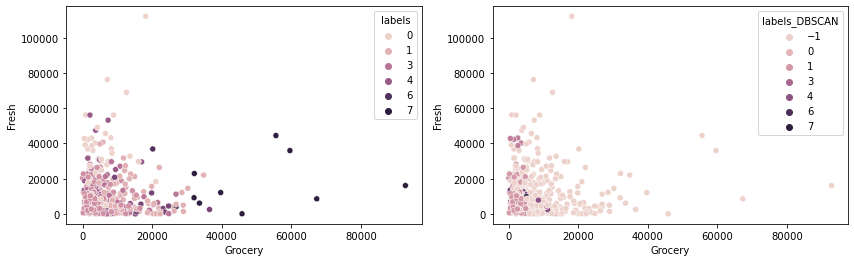

In [80]:
# Your code here:
fig, ax = plt.subplots(1,2, figsize=(14,4))
sns.scatterplot(customers['Grocery'], customers['Fresh'], hue=customers['labels'], data=customers, ax=ax[0])
sns.scatterplot(customers['Grocery'], customers['Fresh'], hue=customers['labels_DBSCAN'], data=customers, ax=ax[1])

Visualize `Frozen` as X and `Delicassen` as y by `labels` and `labels_DBSCAN` respectively

C:\Users\msart\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\msart\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Frozen', ylabel='Delicassen'>

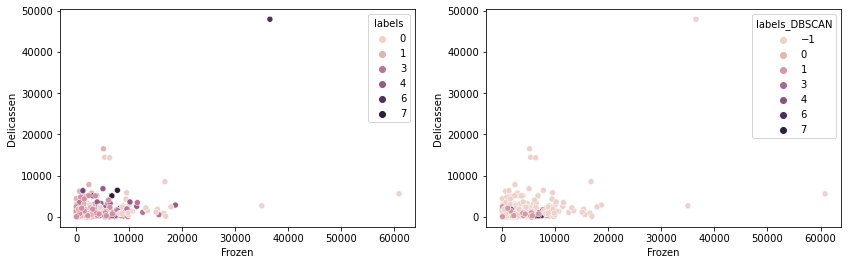

In [81]:
# Your code here:
fig, ax = plt.subplots(1,2, figsize=(14,4))
sns.scatterplot(customers['Frozen'], customers['Delicassen'], hue=customers['labels'], data=customers, ax=ax[0])
sns.scatterplot(customers['Frozen'], customers['Delicassen'], hue=customers['labels_DBSCAN'], data=customers, ax=ax[1])

Let's use a groupby to see how the mean differs between the groups. Group `customers` by `labels` and `labels_DBSCAN` respectively and compute the means for all columns.

In [82]:
# Your code here:
customers.groupby(['labels','labels_DBSCAN']).mean()

Fresh          Milk       Grocery        Frozen  \
labels labels_DBSCAN                                                           
0      -1             33318.114286   5436.800000   6084.200000  11804.885714   
        2             41446.600000   1421.200000   2167.600000   1276.400000   
1      -1              9990.234568   9270.172840  14381.666667   1559.827160   
        0             11401.000000   3536.200000   6729.000000    720.200000   
        3              2357.200000  10224.800000  11862.800000    609.600000   
        4              3068.142857   6095.857143  10355.000000    994.000000   
2      -1              9380.209302   6344.255814   6472.325581   2689.790698   
        1              8964.242188   1862.421875   2433.296875   2036.929688   
3      -1              9649.150000   5242.300000   8385.875000   2906.375000   
        7              7494.600000   1537.600000   3383.000000   2575.400000   
4      -1             16253.612903   5746.548387   5669.322581   3565.806452   
        5              9837.863636   1751.863636   2161.681818   1513.181818   
        6              6823.000000   1943.000000   2372.666667   6780.333333   
5      -1              4709.187500   8915.812500  16200.937500   2189.500000   
6      -1             36847.000000  43950.000000  20170.000000  36534.000000   
7      -1             15964.900000  34708.500000  48536.900000   3054.600000   

                      Detergents_Paper    Delicassen  Channel_1  Channel_2  \
labels labels_DBSCAN                                                         
0      -1                   937.314286   2940.971429       1.00       0.00   
        2                   416.200000    784.800000       1.00       0.00   
1      -1                  5831.358025   1908.518519       0.00       1.00   
        0                  3561.000000    258.200000       0.00       1.00   
        3                  5780.000000    572.800000       0.00       1.00   
        4                  4675.571429   1826.428571       0.00       1.00   
2      -1                  1596.418605   1767.116279       1.00       0.00   
        1                   496.015625    743.593750       1.00       0.00   
3      -1                  3320.000000   1074.425000       0.55       0.45   
        7                   227.400000    941.000000       1.00       0.00   
4      -1                  1497.258065   1684.870968       1.00       0.00   
        5                   333.954545    669.045455       1.00       0.00   
        6                   386.500000    613.666667       1.00       0.00   
5      -1                  6878.187500   1606.500000       0.00       1.00   
6      -1                   239.000000  47943.000000       1.00       0.00   
7      -1                 24875.200000   2942.800000       0.00       1.00   

                      Region_1  Region_2  Region_3  
labels labels_DBSCAN                                
0      -1                  0.0  0.028571  0.971429  
        2                  0.0  0.000000  1.000000  
1      -1                  0.0  0.000000  1.000000  
        0                  0.0  0.000000  1.000000  
        3                  0.0  0.000000  1.000000  
        4                  0.0  0.000000  1.000000  
2      -1                  0.0  0.000000  1.000000  
        1                  0.0  0.000000  1.000000  
3      -1                  0.0  1.000000  0.000000  
        7                  0.0  1.000000  0.000000  
4      -1                  1.0  0.000000  0.000000  
        5                  1.0  0.000000  0.000000  
        6                  1.0  0.000000  0.000000  
5      -1                  1.0  0.000000  0.000000  
6      -1                  0.0  0.000000  1.000000  
7      -1                  0.2  0.100000  0.700000

Which algorithm appears to perform better?

In [ ]:
# Your observations here

# Bonus Challenge 1 - Changing K-Means Number of Clusters

As we mentioned earlier, we don't need to worry about the number of clusters with DBSCAN because it automatically decides that based on the parameters we send to it. But with K-Means, we have to supply the `n_clusters` param (if you don't supply `n_clusters`, the algorithm will use `8` by default). You need to know that the optimal number of clusters differs case by case based on the dataset. K-Means can perform badly if the wrong number of clusters is used.

In advanced machine learning, data scientists try different numbers of clusters and evaluate the results with statistical measures (read [here](https://en.wikipedia.org/wiki/Cluster_analysis#External_evaluation)). We are not using statistical measures today but we'll use our eyes instead. In the cells below, experiment with different number of clusters and visualize with scatter plots. What number of clusters seems to work best for K-Means?

C:\Users\msart\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


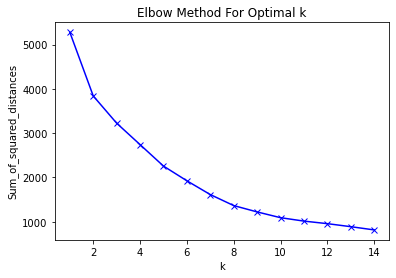

In [87]:
# For each k value, we will initialise k-means and use the inertia attribute
# to identify the sum of squared distances of samples to the nearest cluster centre.

Sum_of_squared_distances = []

K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(customers_scale)
    Sum_of_squared_distances.append(km.inertia_)
    
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In the plot above the elbow (if the plot looks like an arm, then the elbow on the arm is optimal k.) is at k=5 indicating the optimal k for this dataset is 7

# Bonus Challenge 2 - Changing DBSCAN `eps` and `min_samples`

Experiment changing the `eps` and `min_samples` params for DBSCAN. See how the results differ with scatter plot visualization.

epsfloat, default=0.5
The maximum distance between two samples for one to be considered as in the neighborhood of the other. This is not a maximum bound on the distances of points within a cluster. This is the most important DBSCAN parameter to choose appropriately for your data set and distance function.

min_samplesint, default=5
The number of samples (or total weight) in a neighborhood for a point to be considered as a core point. This includes the point itself.

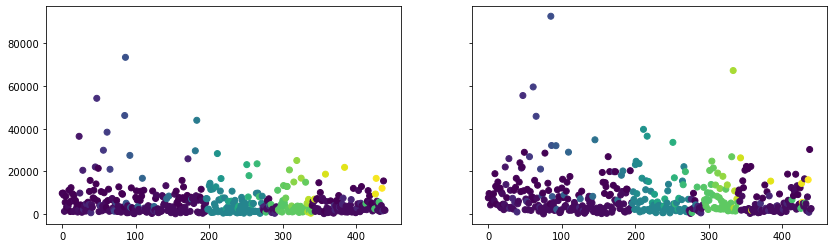

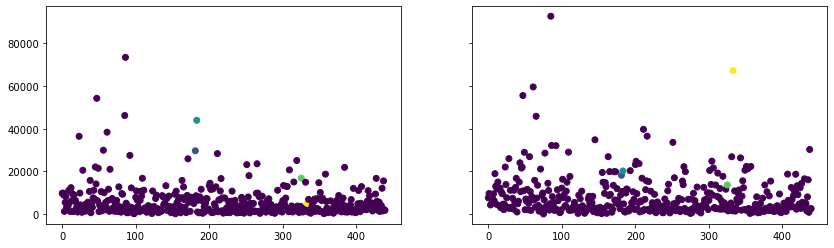

In [91]:
# Changing just eps
DBSCAN_exp = DBSCAN(eps=1, min_samples=1)
preds = DBSCAN_exp.fit_predict(customers_scale)

fig, ax = plt.subplots(1,2, sharey=True, figsize=(14,4))
ax[0].scatter(customers.index, customers['Milk'], c=preds)
ax[1].scatter(customers.index, customers['Grocery'], c=preds)

######################################################
DBSCAN_exp = DBSCAN(eps=5, min_samples=1)
preds = DBSCAN_exp.fit_predict(customers_scale)

fig, ax = plt.subplots(1,2, sharey=True, figsize=(14,4))
ax[0].scatter(customers.index, customers['Milk'], c=preds)
ax[1].scatter(customers.index, customers['Grocery'], c=preds)

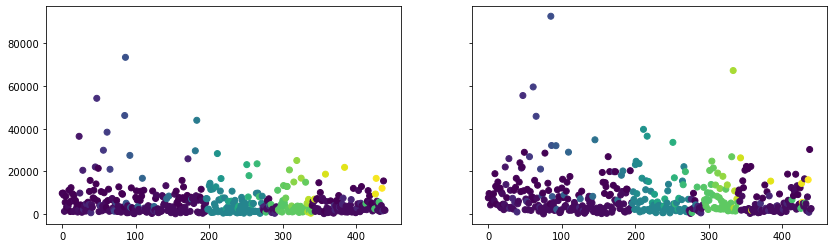

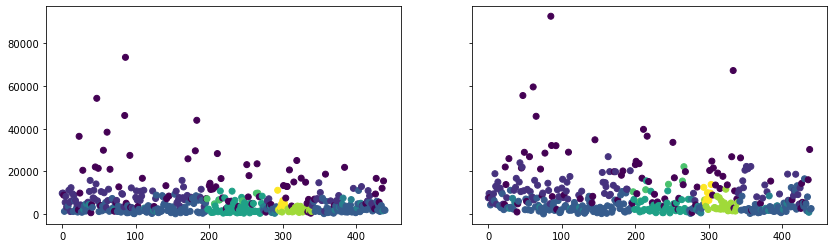

In [92]:
# Changing just min_samples
DBSCAN_exp = DBSCAN(eps=1, min_samples=1)
preds = DBSCAN_exp.fit_predict(customers_scale)

fig, ax = plt.subplots(1,2, sharey=True, figsize=(14,4))
ax[0].scatter(customers.index, customers['Milk'], c=preds)
ax[1].scatter(customers.index, customers['Grocery'], c=preds)

######################################################
DBSCAN_exp = DBSCAN(eps=1, min_samples=5)
preds = DBSCAN_exp.fit_predict(customers_scale)

fig, ax = plt.subplots(1,2, sharey=True, figsize=(14,4))
ax[0].scatter(customers.index, customers['Milk'], c=preds)
ax[1].scatter(customers.index, customers['Grocery'], c=preds)

I tried to follow this tutorial to find the best eps, but I don't think I made it correctly:
https://towardsdatascience.com/machine-learning-clustering-dbscan-determine-the-optimal-value-for-epsilon-eps-python-example-3100091cfbc

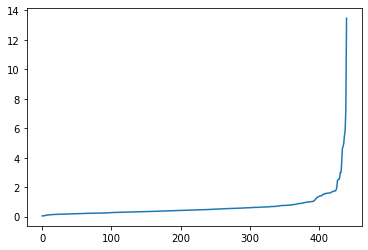

In [109]:
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
from matplotlib import pyplot as plt
import seaborn as sns

# We can calculate the distance from each point to its closest neighbour using the NearestNeighbors.
# The point itself is included in n_neighbors. The kneighbors method returns two arrays,
# one which contains the distance to the closest n_neighbors points and the other which
# contains the index for each of those points.

neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(customers_scale)
distances, indices = nbrs.kneighbors(customers_scale)

# Next, we sort and plot results.
# The optimal value for epsilon will be found at the point of maximum curvature.
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

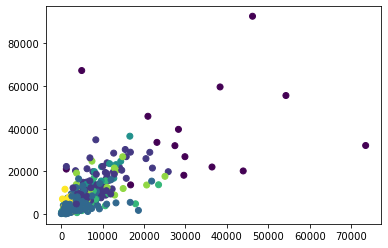

In [111]:
# We train our model, selecting 2 for eps and setting min_samples to 5.
m = DBSCAN(eps=2)
m.fit(customers_scale)

clusters = m.labels_
plt.scatter(customers['Milk'], customers['Grocery'], c=clusters)